In [53]:
import numpy as np
import curvedsky
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
import matplotlib as mpl

In [54]:
class bin1D(object):
    def __init__(self, ls, bin_edges):
        self.centers = (bin_edges[1:]+bin_edges[:-1])/2.
        self.digitized = np.digitize(ls, bin_edges,right=True)
        self.bin_edges = bin_edges
    def bin(self,data1d,weights=None):
        if weights is None:
            res = np.bincount(self.digitized,(data1d).reshape(-1))[1:-1]/np.bincount(self.digitized)[1:-1]
        else:
            res = np.bincount(self.digitized,(data1d*weights).reshape(-1))[1:-1]/np.bincount(self.digitized,weights.reshape(-1))[1:-1]
        return self.centers,res

In [55]:
Lmax = 3000
Ls = np.arange(0, Lmax+1)
mpl.rcParams['font.size']=12

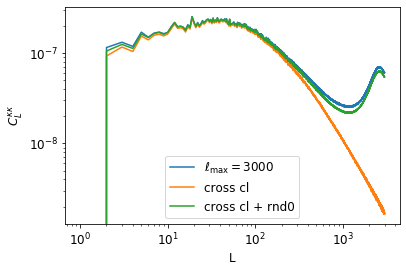

In [56]:
ellmaxs = [3000, 4000]
ellmaxs = [3000]
for ellmax in ellmaxs:
    ells = np.arange(0, ellmax+1)
    clpp = np.loadtxt('../inputPs/cosmo2017_10K_acc3_lenspotentialCls.dat', usecols=5, unpack=True)
    clpp = np.concatenate(([0,0],clpp))
    clkk = 2*pi/4*clpp[ells]
    
    reckap_cls = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps/reckap_cl_CMBLensed_fullsky_alm_{i:03d}_30_{ellmax}.csv' \
                                                      for i in range(0,10)]])   
    reckap_cl = np.mean(reckap_cls, axis=0)
    
    # reckap_rot_cls = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps/reckap_cl_CMBLensedRot_fullsky_alm_{i:03d}_30_{ellmax}.csv' for i in range(0,10)]])   
    # reckap_rot_cl = np.mean(reckap_rot_cls, axis=0)
    
    ## plt.plot(Ls, clkk, label='theory')
    plt.plot(Ls, reckap_cl[:,0][Ls], label=r'$\ell_{\mathrm{max}}=%s$'%ellmax)
    # plt.plot(Ls, reckap_rot_cl[:,0][Ls], label='reckap rot cl')
    plt.plot(Ls, reckap_cl[:,1][Ls], label='cross cl')
    plt.plot(Ls, reckap_cl[:,1][Ls]+reckap_cl[:,2][Ls], label='cross cl + rnd0')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('L')
plt.ylabel('$C_L^{\kappa\kappa}$')
plt.legend()

/global/u2/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


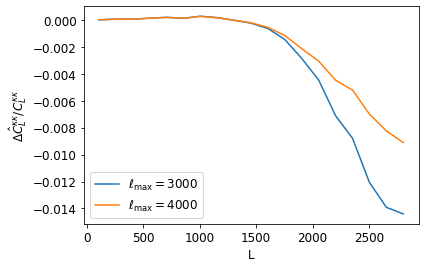

In [57]:
ellmaxs = [3000, 4000]
for ellmax in ellmaxs:
    ells = np.arange(0, ellmax+1)
    clpp = np.loadtxt('../inputPs/cosmo2017_10K_acc3_lenspotentialCls.dat', usecols=5, unpack=True)
    clpp = np.concatenate(([0,0],clpp))
    clkk = 2*pi/4*clpp[ells]
    
    reckap_cls = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps/reckap_cl_CMBLensed_fullsky_alm_{i:03d}_30_{ellmax}.csv' for i in range(0,10)]])   
    reckap_cl = np.mean(reckap_cls, axis=0)
    
    reckap_rot_cls = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps/reckap_cl_CMBLensedRot_fullsky_alm_{i:03d}_30_{ellmax}.csv' for i in range(0,10)]])   
    reckap_rot_cl = np.mean(reckap_rot_cls, axis=0)
    
    bias = ((reckap_rot_cls[:,:Lmax+1,0] - reckap_cls[:,:Lmax+1,0]) - (reckap_rot_cls[:,:Lmax+1,2] - reckap_cls[:,:Lmax+1,2]))/clkk[:Lmax+1]
    bias_mean = np.mean(bias, axis=0)
    bias_err = np.std(bias, axis=0)
    
    bin_edge = np.arange(30, Lmax, 150)
    binner = bin1D(Ls, bin_edge)

    L_bin, bias_mean_bin = binner.bin(bias_mean)
    L_bin, bias_err_bin = binner.bin(bias_err)
    plt.plot(L_bin, bias_mean_bin, label=r'$\ell_{\mathrm{max}}=%s$'%ellmax)

plt.xlabel('L')
plt.ylabel('$\Delta \hat{C}^{\kappa \kappa}_{L}/C^{\kappa \kappa}_{L}$')
plt.legend()

/global/u2/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


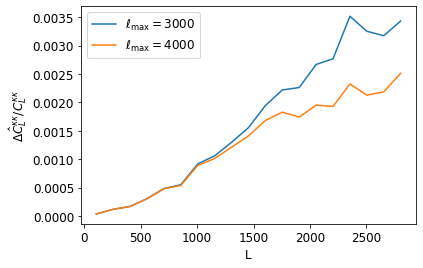

In [64]:
ellmaxs = [3000, 4000]
for ellmax in ellmaxs:
    ells = np.arange(0, ellmax+1)
    clpp = np.loadtxt('../inputPs/cosmo2017_10K_acc3_lenspotentialCls.dat', usecols=5, unpack=True)
    clpp = np.concatenate(([0,0],clpp))
    clkk = 2*pi/4*clpp[ells]
    
    reckap_cls = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps/reckap_cl_CMBLensed_fullsky_alm_{i:03d}_30_{ellmax}.csv' for i in range(0,10)]])   
    reckap_cl = np.mean(reckap_cls, axis=0)
    
    reckap_rot_cls = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps/reckap_cl_CMBLensedRot_fullsky_alm_{i:03d}_30_{ellmax}.csv' for i in range(0,10)]])   
    reckap_rot_cl = np.mean(reckap_rot_cls, axis=0)
    
    bias = (reckap_rot_cls[:,:Lmax+1,0] - reckap_cls[:,:Lmax+1,0])/clkk[:Lmax+1]
    bias_mean = np.mean(bias, axis=0)
    bias_err = np.std(bias, axis=0)
    
    bin_edge = np.arange(30, Lmax, 150)
    binner = bin1D(Ls, bin_edge)

    L_bin, bias_mean_bin = binner.bin(bias_mean)
    L_bin, bias_err_bin = binner.bin(bias_err)
    plt.plot(L_bin, bias_mean_bin, label=r'$\ell_{\mathrm{max}}=%s$'%ellmax)

plt.xlabel('L')
plt.ylabel('$\Delta \hat{C}^{\kappa \kappa}_{L}/C^{\kappa \kappa}_{L}$')
plt.legend()

/global/u2/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


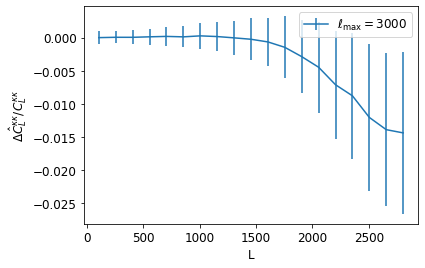

In [61]:
ellmaxs = [3000]
for ellmax in ellmaxs:
    ells = np.arange(0, ellmax+1)
    clpp = np.loadtxt('../inputPs/cosmo2017_10K_acc3_lenspotentialCls.dat', usecols=5, unpack=True)
    clpp = np.concatenate(([0,0],clpp))
    clkk = 2*pi/4*clpp[ells]
    
    reckap_cls = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps/reckap_cl_CMBLensed_fullsky_alm_{i:03d}_30_{ellmax}.csv' for i in range(0,10)]])   
    reckap_cl = np.mean(reckap_cls, axis=0)
    
    reckap_rot_cls = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps/reckap_cl_CMBLensedRot_fullsky_alm_{i:03d}_30_{ellmax}.csv' for i in range(0,10)]])   
    reckap_rot_cl = np.mean(reckap_rot_cls, axis=0)
    
    bias = ((reckap_rot_cls[:,:Lmax+1,0] - reckap_cls[:,:Lmax+1,0]) - (reckap_rot_cls[:,:Lmax+1,2] - reckap_cls[:,:Lmax+1,2]))/clkk[:Lmax+1]
    bias_mean = np.mean(bias, axis=0)
    bias_err = np.std(bias, axis=0)
    
    bin_edge = np.arange(30, Lmax, 150)
    binner = bin1D(Ls, bin_edge)

    L_bin, bias_mean_bin = binner.bin(bias_mean)
    L_bin, bias_err_bin = binner.bin(bias_err)
    plt.errorbar(L_bin, bias_mean_bin, yerr=bias_err_bin, label=r'$\ell_{\mathrm{max}}=%s$'%ellmax)

plt.xlabel('L')
plt.ylabel('$\Delta \hat{C}^{\kappa \kappa}_{L}/C^{\kappa \kappa}_{L}$')
plt.legend()

/global/u2/h/hongbo/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


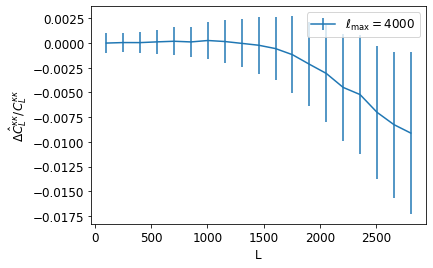

In [62]:
ellmaxs = [4000]
for ellmax in ellmaxs:
    ells = np.arange(0, ellmax+1)
    clpp = np.loadtxt('../inputPs/cosmo2017_10K_acc3_lenspotentialCls.dat', usecols=5, unpack=True)
    clpp = np.concatenate(([0,0],clpp))
    clkk = 2*pi/4*clpp[ells]
    
    reckap_cls = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps/reckap_cl_CMBLensed_fullsky_alm_{i:03d}_30_{ellmax}.csv' for i in range(0,10)]])   
    reckap_cl = np.mean(reckap_cls, axis=0)
    
    reckap_rot_cls = np.array([pd.read_csv(cl) for cl in [f'../output/recon_ps/reckap_cl_CMBLensedRot_fullsky_alm_{i:03d}_30_{ellmax}.csv' for i in range(0,10)]])   
    reckap_rot_cl = np.mean(reckap_rot_cls, axis=0)
    
    bias = ((reckap_rot_cls[:,:Lmax+1,0] - reckap_cls[:,:Lmax+1,0]) - (reckap_rot_cls[:,:Lmax+1,2] - reckap_cls[:,:Lmax+1,2]))/clkk[:Lmax+1]
    bias_mean = np.mean(bias, axis=0)
    bias_err = np.std(bias, axis=0)
    
    bin_edge = np.arange(30, Lmax, 150)
    binner = bin1D(Ls, bin_edge)

    L_bin, bias_mean_bin = binner.bin(bias_mean)
    L_bin, bias_err_bin = binner.bin(bias_err)
    plt.errorbar(L_bin, bias_mean_bin, yerr=bias_err_bin, label=r'$\ell_{\mathrm{max}}=%s$'%ellmax)

plt.xlabel('L')
plt.ylabel('$\Delta \hat{C}^{\kappa \kappa}_{L}/C^{\kappa \kappa}_{L}$')
plt.legend()

In [12]:
a = '/global/cscratch1/sd/hongbo/lens_rot_bias/Maps/CMBLensed_fullsky_alm_000.fits'

In [80]:
# b = re.split('Maps|/|.fits',a)
# b

In [82]:
import re
b = re.split('alm_|/|.fits',a)
b

['',
 'global',
 'cscratch1',
 'sd',
 'hongbo',
 'lens_rot_bias',
 'Maps',
 'CMBLensed_fullsky_',
 '000',
 '']

In [13]:
b[-2]

'000'